In [2]:
import torch
import os
from transformer_lens import HookedTransformer

from core.utils.feature_activation import draw_feature_density

os.environ["https_proxy"] = "http://localhost:7890"

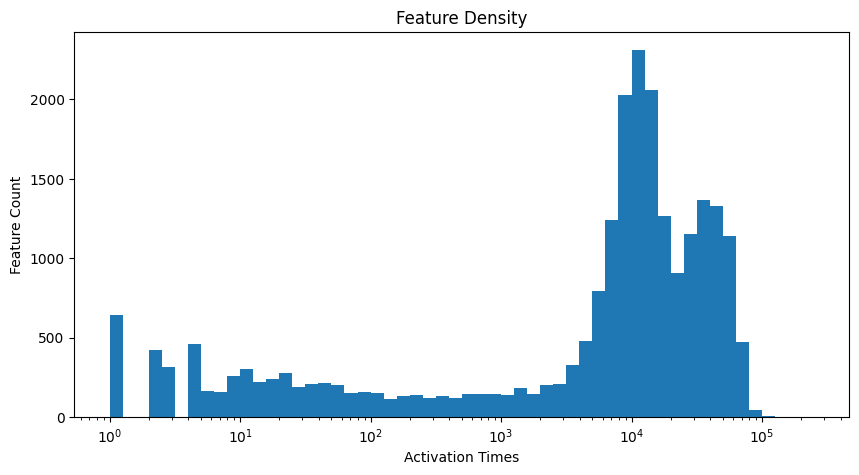

In [3]:
feature_activations = torch.load("analysis/test.pt", "cuda")

draw_feature_density(feature_activations, "density.png")

In [4]:
model = HookedTransformer.from_pretrained('gpt2', device="cuda")
model.eval()

Loaded pretrained model gpt2 into HookedTransformer


HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-11): 12 x TransformerBlock(
      (ln1): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (h

In [10]:
import json

# act_rank_percent = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# indices = torch.tensor([0, 1000, 2000, 3000, 4000], device="cuda")
indices = torch.tensor([6243], device="cuda")
# result = search_feature(feature_activations, act_rank_percent=act_rank_percent)
result = feature_activations

for i, index in enumerate(indices):
    # print(f"Top {percent * 100}% of activations: ")
    print(f"Index: {index}")

    act_times = result["act_times"][index]
    print(f"Activation times: {act_times}")
    for j in range(150):
        contexts = result["contexts"][index][j]
        activated = result["feature_acts"][index][j].nonzero(as_tuple=True)[0]
        print(f"Context: ", json.dumps(model.tokenizer.decode(contexts)))
        print(f"Activated tokens: ", json.dumps(model.to_str_tokens(contexts[activated])))

Index: 6243
Activation times: 5988
Context:  "<|endoftext|> but we are gonna make a determination at that.\"\n\nWhile the majority of those facing deportation would not be Mexican, according to Mexican officials, S\u00e1nchez said the Mexican government will have several measures ready to deal with the possible deportations.\n\n\"Of course this and other matters will be part of the agenda that Mexico brings to the table during the bilateral meetings that will take place with the government of President-elect Donald Trump,\" S\u00e1nchez said.\n\nHumberto Roque Villanueva, Mexico's deputy interior minister for migration, said Nov. 9, the day after the election, that"
Activated tokens:  [" S", "\u00e1n", "H", "umber", " Ro", "que", " Vill", "an"]
Context:  "<|endoftext|> clubs. It's about relations, we didn't discuss players or anything. It's important for big clubs to have good relations. This is also why I keep saying that in Serie A it's important for the clubs to have good relations 